Importy

In [2]:
from Number import *
from recursive_det import *
from inverse_matrix import *
from LU_factorisation import *
import numpy as np
from  timeit import default_timer as timer
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from csv import reader

kod do mierzenia performancu konkretnych algorytmów

In [3]:
def measure_algorithm(name, datatype_number = True):
    results = []
    for k in range(2, 10):
        mat1 = gen_mat_of_size_2_power_k(k, datatype_number)
        start = timer()
        name(mat1)
        end = timer()
        results.append([2**k, Number.ADD_counter, Number.MUL_counter,Number.ADD_counter + Number.MUL_counter, end-start])
        Number.reset_counters()
    df = pd.DataFrame(results, columns=["rozmiar", "operacje addytywne", "operacje multiplikatywne","wszystkie operacje zmiennoprzecinkowe", "czas wykonania"])
    return df

Wizualizacje zebranych danych

In [4]:
def visualise_multiplication(data_frame, name):
    print(data_frame)
    powers = data_frame["rozmiar"]
    add_cnt= data_frame["operacje addytywne"]
    mul_cnt = data_frame["operacje multiplikatywne"]
    fl_cnt = data_frame["wszystkie operacje zmiennoprzecinkowe"]
    time = data_frame["czas wykonania"]

    plt.plot(powers, add_cnt, label = f"liczba operacji addytywnych przy {name}", color="blue")
    plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy {name}", color="green")
    # plt.plot(powers, fl_cnt, label = f"liczba wszystkich operacji zmiennoprzecinkowych przy mnożeniu metodą {name}", color="red")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel("liczba operacji zmiennoprzecinkowych")
    plt.legend()
    # plt.semilogy()
    plt.show()

    # plt.plot(powers, mul_cnt, label = f"liczba operacji multiplikatywnych przy mnożeniu metodą {name}", color="black")
    # plt.xlabel("potęga")
    # plt.ylabel("liczba operacji multiplikatywnych")
    # plt.legend()
    # plt.semilogy()
    # plt.show()

    plt.plot(powers, time, label = f"czas wykonania {name}", color="black")
    plt.xlabel("liczba elementów macierzy")
    plt.ylabel("czas wykonania [s]")
    plt.legend()
    # plt.semilogy()
    plt.show()

In [5]:
def show_plot(df_list, name, ylabel):
    color_list = ["blue", "red", "green", "black", "yelow", "pink"]
    powers = df_list[0][0]["rozmiar"]
    for ind, elem in enumerate(df_list):
        data, df_name = elem
        plt.plot(powers, data[name], label = df_name, color= color_list[ind])

    plt.title(f"{ylabel} ...")
    plt.xlabel("n")
    plt.ylabel(ylabel)
    plt.legend()
    # plt.semilogy()
    plt.show()

def compare_dataframes(df_list):
    name = "operacje addytywne"
    ylabel = "liczba operacji addytywnych"
    show_plot(df_list,name, ylabel)

    name = "operacje multiplikatywne"
    ylabel = "liczba operacji multiplikatywnych"
    show_plot(df_list,name,ylabel)

    name = "wszystkie operacje zmiennoprzecinkowe"
    ylabel = "liczba wszystkich operacji zmiennoprzecinkowych"
    show_plot(df_list,name,ylabel)

    name = "czas wykonania"
    ylabel = "czas wykonania"
    show_plot(df_list,name, ylabel)

Konkretne pomiary

In [6]:
# LU_df = measure_algorithm(LU_factorise_plain)
# LU_sub_opt_df = measure_algorithm(LU_factorise_opt2)
# LU_triang_opt_df = measure_algorithm(LU_factorise_opt1)
# LU_factorise_df = measure_algorithm(LU_factorise)
LU_df = pd.read_csv("./dataframes/LU.csv", header=0).drop("n", axis=1)
LU_sub_opt_df = pd.read_csv("./dataframes/LU_substitution_opt.csv", header=0).drop("n", axis=1)
LU_triang_opt_df = pd.read_csv("./dataframes/LU_triangular_opt.csv", header=0).drop("n", axis=1)
LU_factorise_df = pd.read_csv("./dataframes/LU_all_opt.csv", header=0).drop("n", axis=1)

In [7]:
# recursive_df = measure_algorithm(recursive_det_plain)
# recursive_triang_opt_df = measure_algorithm(recursive_det_opt1)
# recursive_sub_opt_df = measure_algorithm(recursive_det_opt2)
# recursive_det_df = measure_algorithm(recursive_det)
recursive_df = pd.read_csv("./dataframes/det.csv", header=0).drop("n", axis=1)
recursive_triang_opt_df = pd.read_csv("./dataframes/det_triangular_opt.csv", header=0).drop("n", axis=1)
recursive_sub_opt_df = pd.read_csv("./dataframes/det_substitution_opt.csv", header=0).drop("n", axis=1)
recursive_det_df = pd.read_csv("./dataframes/det_all_opt.csv", header=0).drop("n", axis=1)

In [8]:
# inverse_df = measure_algorithm(inverse_matrix_no_sub)
# inverse_triang_opt_df = measure_algorithm(inverse_matrix_no_sub)
# inverse_sub_opt_df = measure_algorithm(inverse_matrix)
# inverse_matrix_df = measure_algorithm(inverse_matrix)
inverse_df = pd.read_csv("./dataframes/inverse.csv", header=0).drop("n", axis=1)
inverse_triang_opt_df = pd.read_csv("./dataframes/inverse_triangular_opt.csv", header=0).drop("n", axis=1)
inverse_sub_opt_df = pd.read_csv("./dataframes/inverse_substitution_opt.csv", header=0).drop("n", axis=1)
inverse_matrix_df = pd.read_csv("./dataframes/inverse_all_opt.csv", header=0).drop("n", axis=1)

In [9]:
inverse_matrix_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,90,75,165,0.001377
1,8,1120,525,1645,0.007125
2,16,10116,3579,13695,0.048342
3,32,80548,24477,105025,0.376912
4,64,604044,168651,772695,2.319019
5,128,4391668,1169037,5560705,21.914198
6,256,31400172,8135643,39535815,156.464070
7,512,222445300,56755965,279201265,1115.814010


In [10]:
LU_factorise_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,36,33,69,0.000980
1,8,520,285,805,0.003798
2,16,5258,2127,7385,0.027736
3,32,44984,15057,60041,0.190411
4,64,352258,104967,457225,1.640426
5,128,2627112,730065,3357177,13.643214
6,256,19063698,5084151,24147849,100.215904
7,512,136209016,35465793,171674809,719.570205


In [11]:
recursive_det_df

,rozmiar,operacje addytywne,operacje multiplikatywne,wszystkie operacje zmiennoprzecinkowe,czas wykonania
0,4,36,36,72,0.000563
1,8,520,292,812,0.003529
2,16,5258,2142,7400,0.033478
3,32,44984,15088,60072,0.209903
4,64,352258,105030,457288,1.411418
5,128,2627112,730192,3357304,13.069540
6,256,19063698,5084406,24148104,98.567005
7,512,136209016,35466304,171675320,700.078368


Analiza pomiarów

   rozmiar  operacje addytywne  operacje multiplikatywne  \
0        4                  36                        33   
1        8                 520                       285   
2       16                5258                      2127   
3       32               44984                     15057   
4       64              352258                    104967   
5      128             2627112                    730065   
6      256            19063698                   5084151   
7      512           136209016                  35465793   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                     69        0.000980  
1                                    805        0.003798  
2                                   7385        0.027736  
3                                  60041        0.190411  
4                                 457225        1.640426  
5                                3357177       13.643214  
6                               24147849      

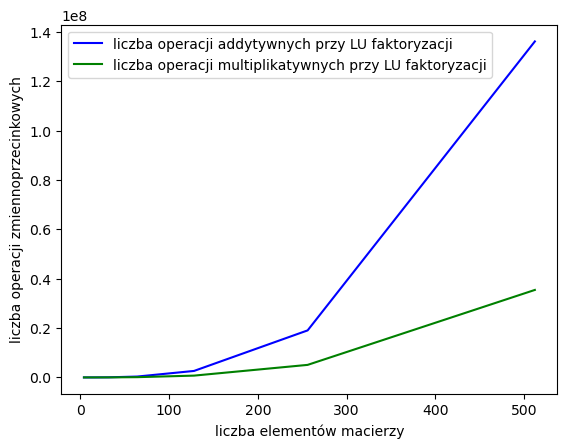

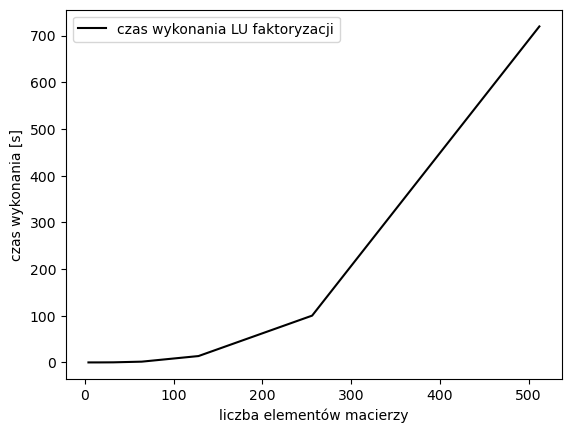

In [12]:
visualise_multiplication(LU_factorise_df, "LU faktoryzacji")

   rozmiar  operacje addytywne  operacje multiplikatywne  \
0        4                  36                        36   
1        8                 520                       292   
2       16                5258                      2142   
3       32               44984                     15088   
4       64              352258                    105030   
5      128             2627112                    730192   
6      256            19063698                   5084406   
7      512           136209016                  35466304   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                     72        0.000563  
1                                    812        0.003529  
2                                   7400        0.033478  
3                                  60072        0.209903  
4                                 457288        1.411418  
5                                3357304       13.069540  
6                               24148104      

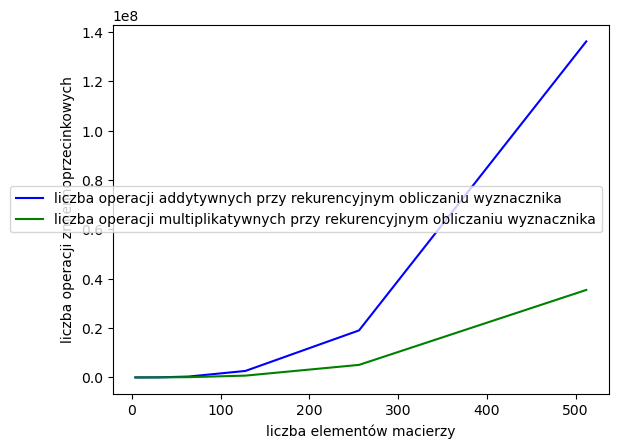

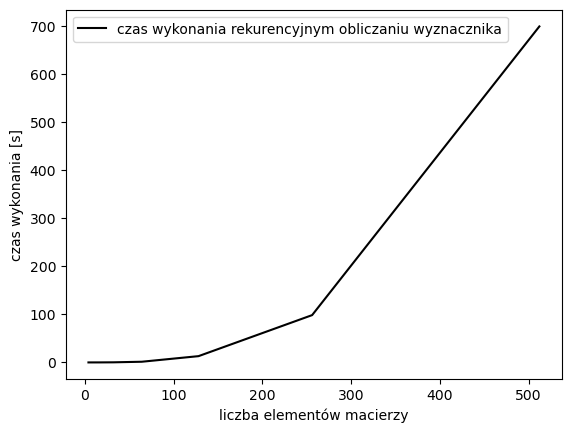

In [13]:
visualise_multiplication(recursive_det_df, "rekurencyjnym obliczaniu wyznacznika")

   rozmiar  operacje addytywne  operacje multiplikatywne  \
0        4                  90                        75   
1        8                1120                       525   
2       16               10116                      3579   
3       32               80548                     24477   
4       64              604044                    168651   
5      128             4391668                   1169037   
6      256            31400172                   8135643   
7      512           222445300                  56755965   

   wszystkie operacje zmiennoprzecinkowe  czas wykonania  
0                                    165        0.001377  
1                                   1645        0.007125  
2                                  13695        0.048342  
3                                 105025        0.376912  
4                                 772695        2.319019  
5                                5560705       21.914198  
6                               39535815      

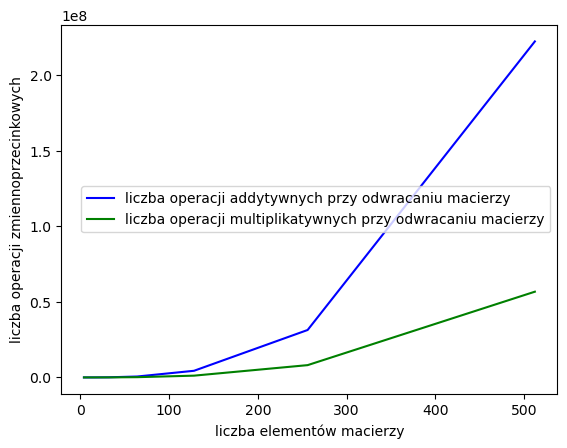

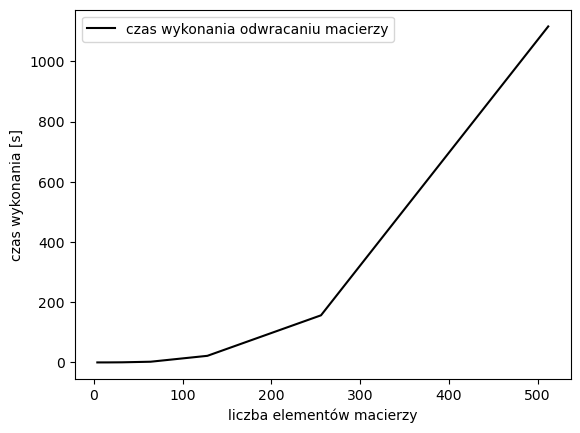

In [14]:
visualise_multiplication(inverse_matrix_df, "odwracaniu macierzy")

Szacowanie złożoność obliczeniowej

Exponent k is approximately: 2.845448894883085
contant a is approximately: 1.4060097356237822e-05


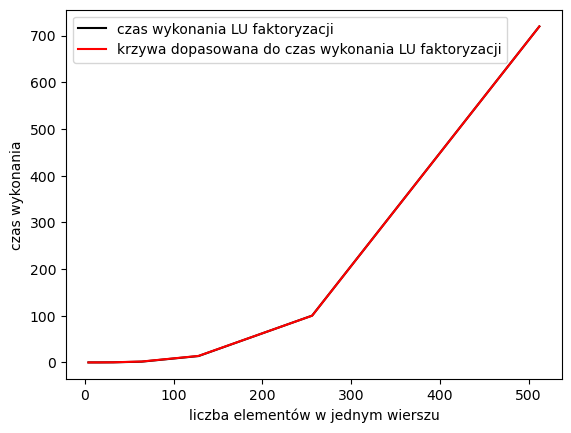

Exponent k is approximately: 2.830402933532466
contant a is approximately: 3.6845380070293046


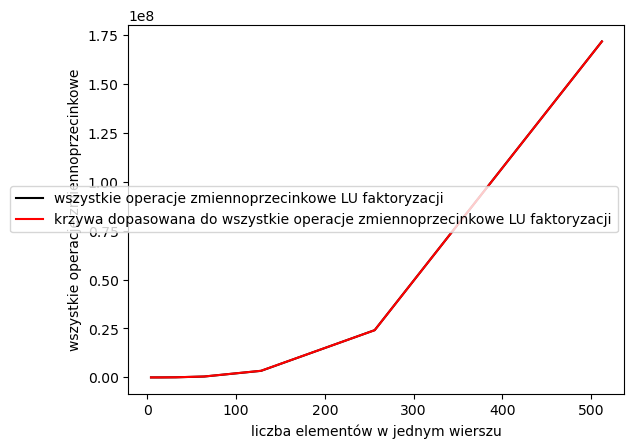

In [15]:
from math import sqrt
def fit_curve(name1, name2, dataframe):
    x_data = dataframe[name1]
    y_data = dataframe[name2]
    def power_law(x, a, k):
        return a*x**k

    params, covariance = curve_fit(power_law, x_data, y_data, p0=[1.0, 1.0])
    a, k = params
    print(f"Exponent k is approximately: {k}")
    print(f"contant a is approximately: {a}")
    return a, k

def plot_with_fit(a, k, data_frame, name1, name2, name):
    powers = data_frame[name1]
    time = data_frame[name2]

    time_spprox = [a * i ** k for i in powers]
    plt.plot(powers, time, label = f"{name2} {name}", color="black")
    plt.plot(powers, time_spprox, label = f"krzywa dopasowana do {name2} {name}", color="red")
    plt.xlabel("liczba elementów w jednym wierszu")
    plt.ylabel(name2)
    plt.legend()
    # plt.semilogy()
    plt.show()

a, k = fit_curve("rozmiar", "czas wykonania", LU_factorise_df)
plot_with_fit(a, k , LU_factorise_df, "rozmiar", "czas wykonania", "LU faktoryzacji")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", LU_factorise_df)
plot_with_fit(a, k , LU_factorise_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "LU faktoryzacji")

Exponent k is approximately: 2.8318917229173923
contant a is approximately: 1.4886698784728313e-05


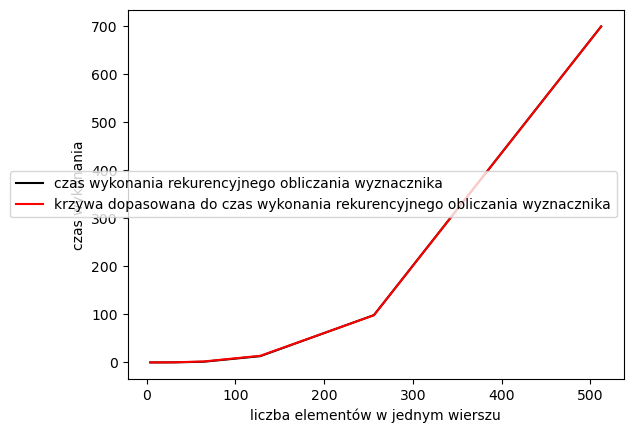

Exponent k is approximately: 2.8303907792317147
contant a is approximately: 3.684828324697632


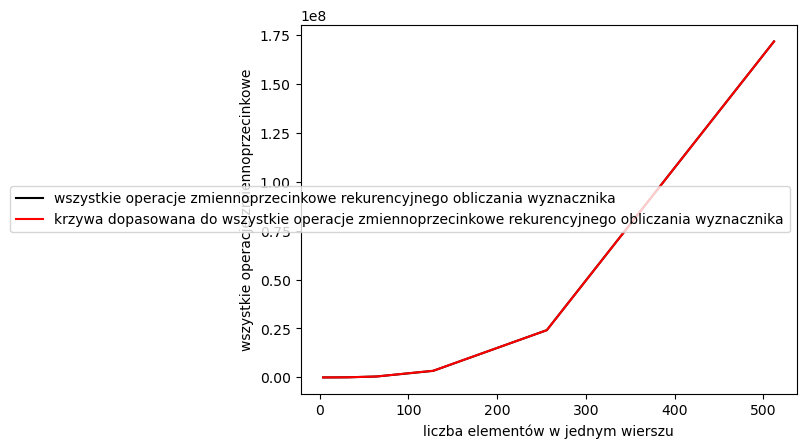

In [16]:
a, k = fit_curve("rozmiar", "czas wykonania", recursive_det_df)
plot_with_fit(a, k , recursive_det_df, "rozmiar", "czas wykonania", "rekurencyjnego obliczania wyznacznika")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", recursive_det_df)
plot_with_fit(a, k , recursive_det_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "rekurencyjnego obliczania wyznacznika")

Exponent k is approximately: 2.8346464073796582
contant a is approximately: 2.3322289661757553e-05


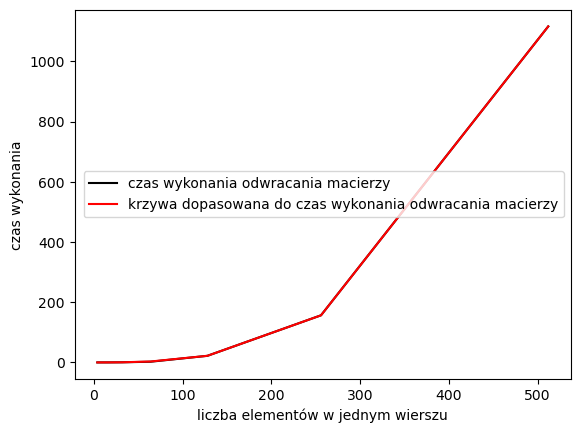

Exponent k is approximately: 2.820480312077323
contant a is approximately: 6.374939374888562


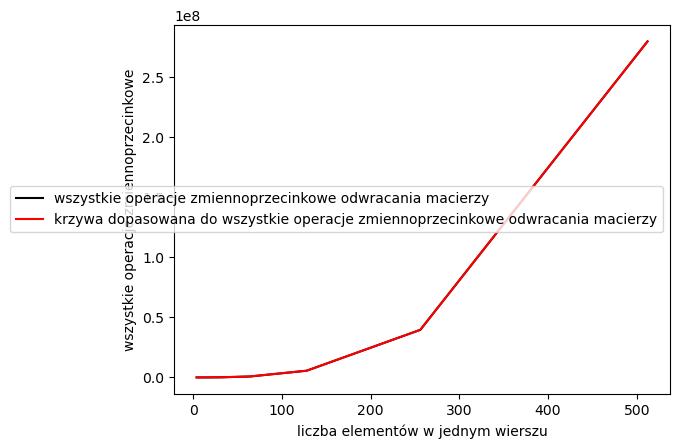

In [17]:
a, k = fit_curve("rozmiar", "czas wykonania", inverse_matrix_df)
plot_with_fit(a, k , inverse_matrix_df, "rozmiar", "czas wykonania", "odwracania macierzy")

a, k = fit_curve("rozmiar", "wszystkie operacje zmiennoprzecinkowe", inverse_matrix_df)
plot_with_fit(a, k , inverse_matrix_df, "rozmiar", "wszystkie operacje zmiennoprzecinkowe", "odwracania macierzy")

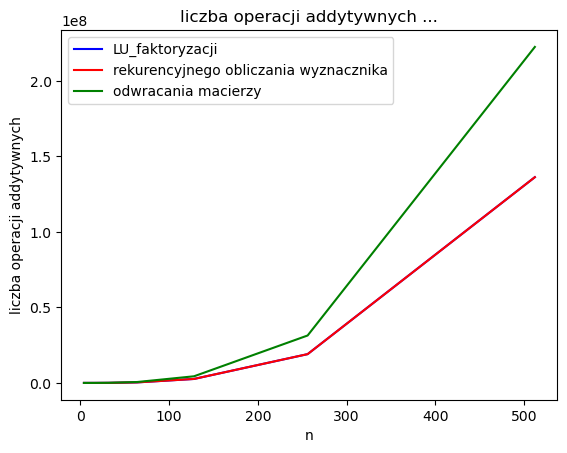

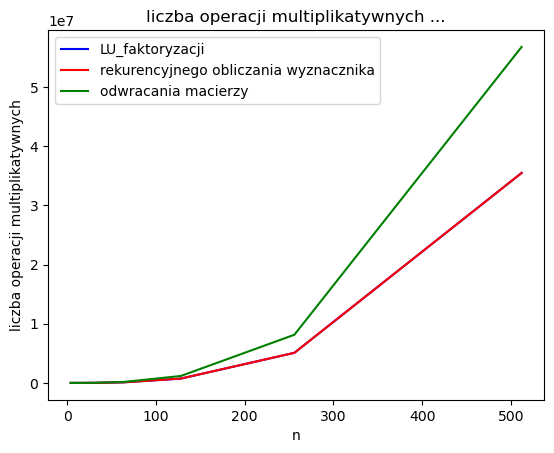

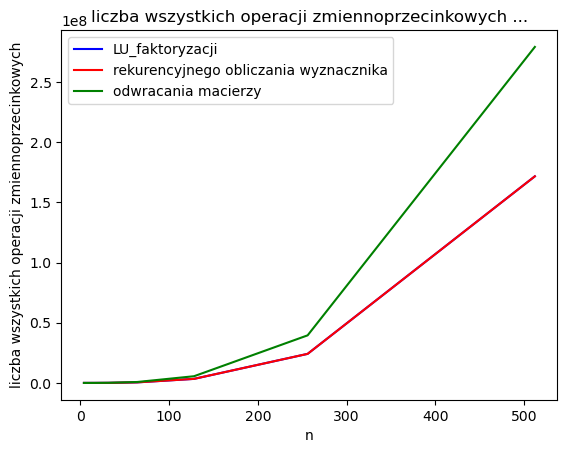

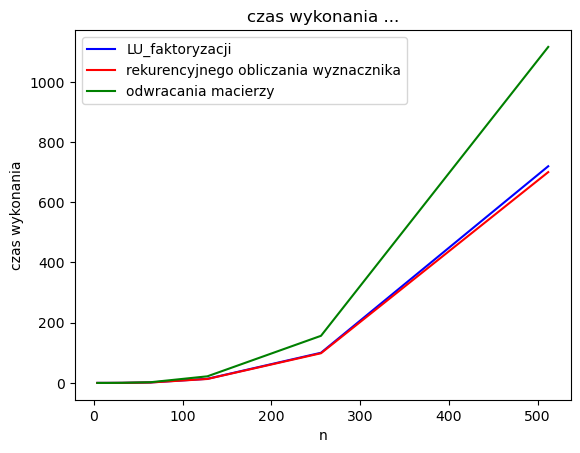

In [18]:
compare_dataframes([(LU_factorise_df, "LU_faktoryzacji"), (recursive_det_df, "rekurencyjnego obliczania wyznacznika"), (inverse_matrix_df, "odwracania macierzy")])

benchmark

In [19]:
# mat1 = np.array(np.genfromtxt("./big_matrix/matrix_data_0.csv", delimiter=",", dtype=float))
# mat2 = np.array(np.genfromtxt("./big_matrix/matrix_data_3.csv", delimiter=",", dtype=float))
from scipy.linalg import lu
# def lu_np(a:np.ndarray):
#     return lu(a)
lu_built_in_df = measure_algorithm(lu, False)

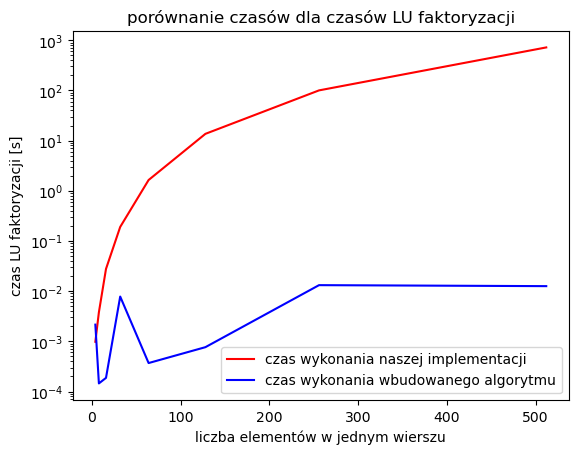

In [20]:
def compare_times(df_1, df_2, name):
    x_es = df_1["rozmiar"]
    times_1 = df_1["czas wykonania"]
    times_2 = df_2["czas wykonania"]
    plt.plot(x_es, times_1, label = f"czas wykonania naszej implementacji", color="red")
    plt.plot(x_es, times_2, label = f"czas wykonania wbudowanego algorytmu", color="blue")
    plt.xlabel("liczba elementów w jednym wierszu")
    plt.ylabel(f"czas {name} [s]")
    plt.title(f"porównanie czasów dla czasów {name}")
    plt.legend()
    plt.semilogy()
    plt.show()

compare_times(LU_factorise_df, lu_built_in_df, "LU faktoryzacji")

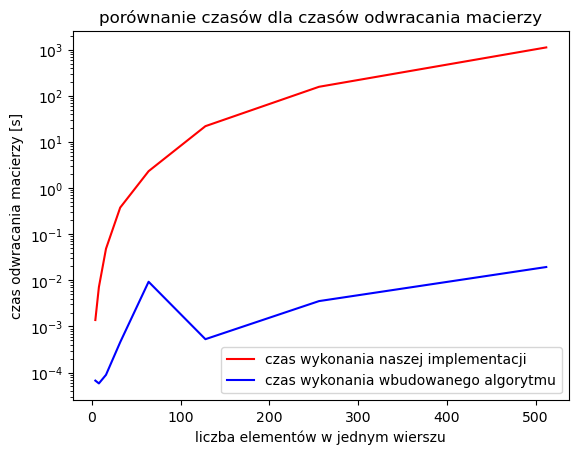

In [21]:
from numpy.linalg import inv
inv_df = measure_algorithm(inv, False)
compare_times(inverse_matrix_df, inv_df, "odwracania macierzy")

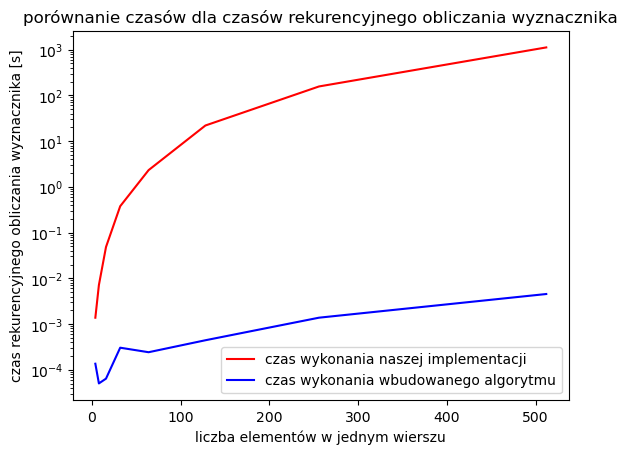

In [22]:
from numpy.linalg import det
det_df = measure_algorithm(det, False)
compare_times(inverse_matrix_df, det_df, "rekurencyjnego obliczania wyznacznika")

In [23]:
for i in range(2, 7):
    mat1 = gen_mat_of_size_2_power_k(i, False)
    res = inverse_matrix(mat1)
    sol = np.linalg.inv(mat1)
    print(f"czy numpy zwrócił to samo dla macierzy rozmiaru 2^{i}?")
    print("tak" if np.allclose(np.array(res).astype("float64"), np.array(sol)) == True else "nie")
    print("_____________________________")

czy numpy zwrócił to samo dla macierzy rozmiaru 2^2?
tak
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^3?
tak
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^4?
tak
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^5?
tak
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^6?
tak
_____________________________


In [31]:
for i in range(2, 7):
    mat1 = gen_mat_of_size_2_power_k(i, False)
    res = recursive_det(mat1)
    sol = np.linalg.det(mat1)
    print(f"czy numpy zwrócił to samo dla macierzy rozmiaru 2^{i}?")
    print(f"tak \n numpy: {sol} nasz kod: {res}" if np.allclose(np.array(res).astype("float64"), np.array(sol)) == True else "nie")
    print("_____________________________")

czy numpy zwrócił to samo dla macierzy rozmiaru 2^2?
tak 
 numpy: -0.16277483853747693 nasz kod: -0.16277483853747687
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^3?
tak 
 numpy: 0.047494036709239865 nasz kod: 0.047494036709239816
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^4?
tak 
 numpy: -0.11015387050738872 nasz kod: -0.11015387050738906
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^5?
tak 
 numpy: -2.474076089977381 nasz kod: -2.474076091620097
_____________________________
czy numpy zwrócił to samo dla macierzy rozmiaru 2^6?
tak 
 numpy: -1769795834.317552 nasz kod: -1769795834.0726392
_____________________________


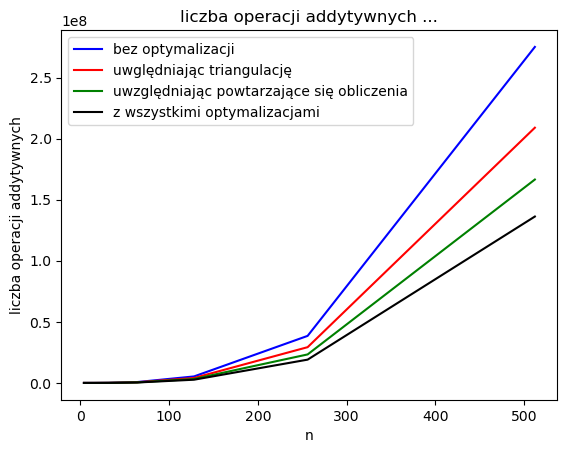

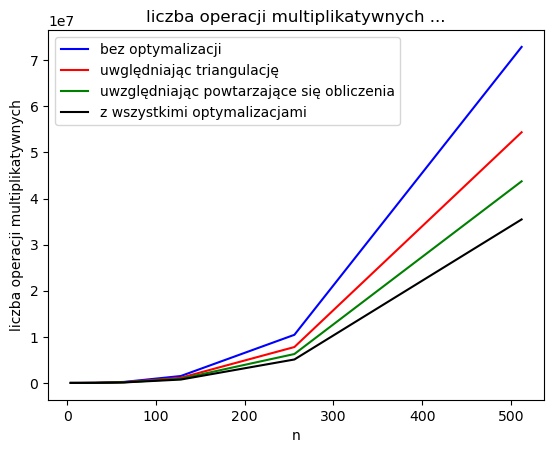

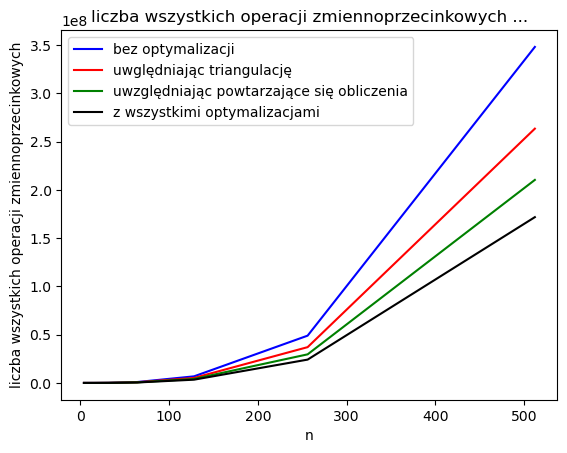

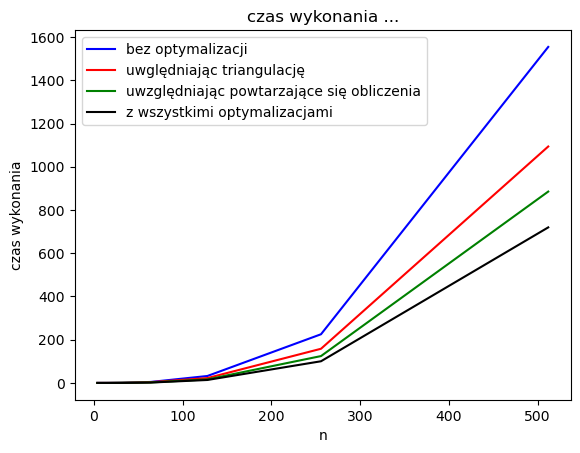

In [30]:
compare_dataframes([(LU_df, "bez optymalizacji"),(LU_triang_opt_df, "uwględniając triangulację"),(LU_sub_opt_df, "uwzględniając powtarzające się obliczenia"),(LU_factorise_df, "z wszystkimi optymalizacjami")])

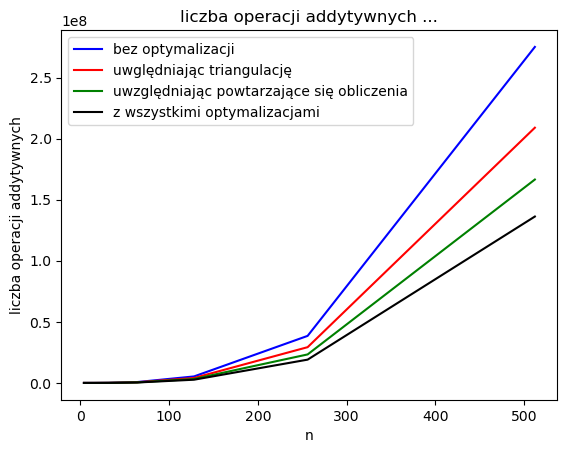

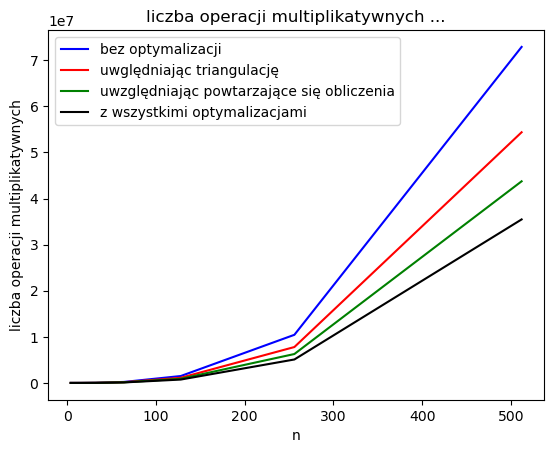

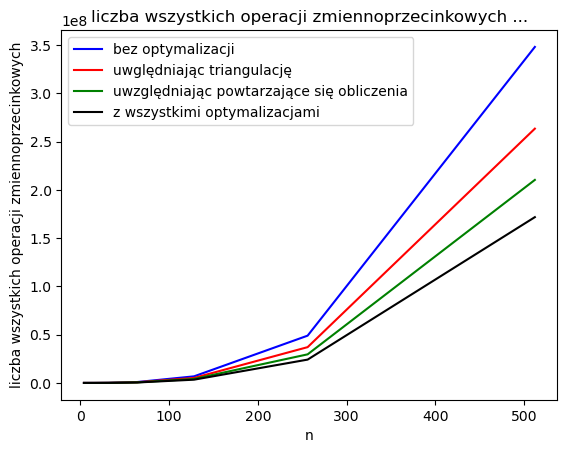

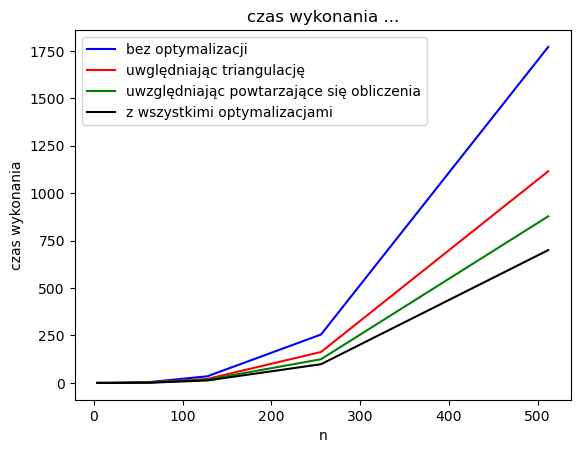

In [26]:
compare_dataframes([(recursive_df, "bez optymalizacji"),(recursive_triang_opt_df, "uwględniając triangulację"),(recursive_sub_opt_df, "uwzględniając powtarzające się obliczenia"),(recursive_det_df, "z wszystkimi optymalizacjami")])

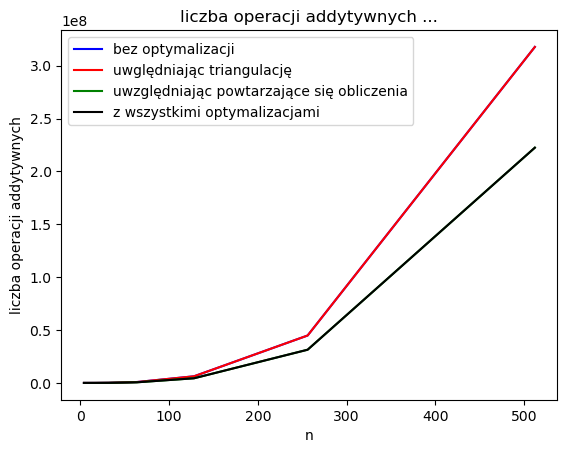

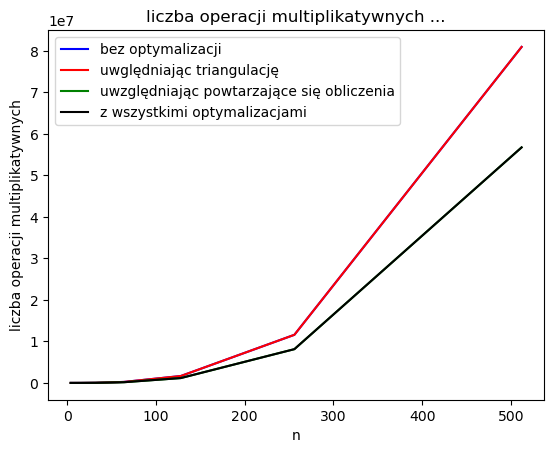

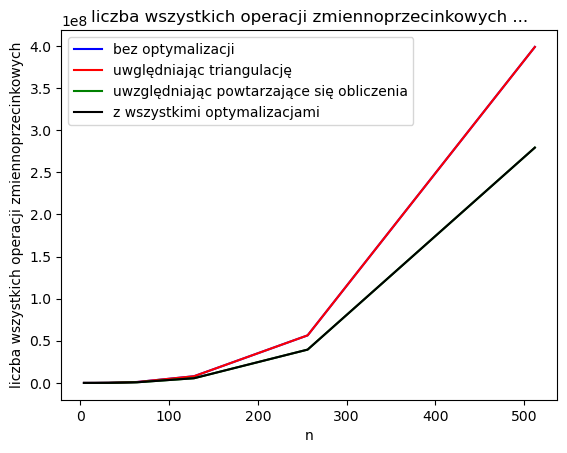

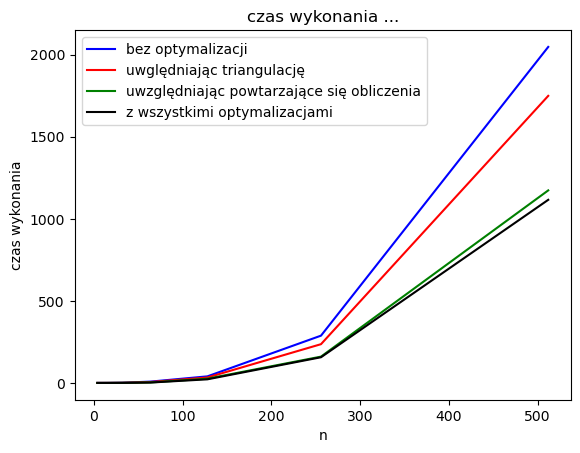

In [27]:
compare_dataframes([(inverse_df, "bez optymalizacji"),(inverse_triang_opt_df, "uwględniając triangulację"),(inverse_sub_opt_df, "uwzględniając powtarzające się obliczenia"),(inverse_matrix_df, "z wszystkimi optymalizacjami")])